In [1]:
!pip install gensim
!pip install matplotlib
!pip install -U sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

#  Graph  Construction

In [2]:
import networkx as nx
import random
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

In [3]:
dataset = KarateClub()[0]

In [4]:
dataset

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [5]:
dataset.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [6]:
karate_graph = to_networkx(dataset)

for node in karate_graph.nodes:
    karate_graph.nodes[node]["class"] = dataset.y.tolist()[node]
    

In [7]:
karate_graph.nodes(data=True)

NodeDataView({0: {'class': 1}, 1: {'class': 1}, 2: {'class': 1}, 3: {'class': 1}, 4: {'class': 3}, 5: {'class': 3}, 6: {'class': 3}, 7: {'class': 1}, 8: {'class': 0}, 9: {'class': 1}, 10: {'class': 3}, 11: {'class': 1}, 12: {'class': 1}, 13: {'class': 1}, 14: {'class': 0}, 15: {'class': 0}, 16: {'class': 3}, 17: {'class': 1}, 18: {'class': 0}, 19: {'class': 1}, 20: {'class': 0}, 21: {'class': 1}, 22: {'class': 0}, 23: {'class': 0}, 24: {'class': 2}, 25: {'class': 2}, 26: {'class': 0}, 27: {'class': 0}, 28: {'class': 2}, 29: {'class': 0}, 30: {'class': 0}, 31: {'class': 2}, 32: {'class': 0}, 33: {'class': 0}})

# Random Walk

In [8]:
'''
    graph : Graph
    start_node : start_node of random walk sequence
    num_steps : the length of random walk sequnce
'''
def random_walk(graph, start_node, num_steps):
    result = []
    current_node = start_node
    for _ in range(num_steps):
        result.append(current_node)
        neighbors = list(graph .neighbors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)

    return result

In [9]:
start_node = random.choice(list(karate_graph.nodes()))
num_steps = 10  # the number of steps for random walk (length of sequence)

print("Random Walk:")

result = random_walk(karate_graph, start_node, num_steps)
print(result)

Random Walk:
[12, 0, 13, 1, 2, 0, 1, 30, 33, 15]


# Deep Walk Code

In [10]:
import numpy as np
import random
from gensim.models import Word2Vec
from torch.utils.data import Dataset
from functools import partial

__building dataset__

In [11]:
dataset = [random_walk(karate_graph, start_node=random.choice(list(karate_graph.nodes)), num_steps=20) for _ in range(100)]

In [12]:
for seq in dataset:
    print(seq)

[8, 32, 22, 33, 18, 33, 9, 2, 28, 2, 32, 33, 23, 33, 29, 26, 29, 26, 29, 32]
[31, 0, 4, 0, 1, 21, 0, 21, 1, 13, 3, 12, 3, 7, 1, 13, 1, 21, 0, 12]
[18, 32, 14, 32, 18, 33, 9, 2, 13, 33, 18, 32, 18, 32, 22, 33, 18, 32, 15, 32]
[13, 2, 3, 0, 13, 33, 19, 33, 14, 32, 2, 0, 19, 1, 30, 1, 30, 1, 2, 32]
[4, 0, 17, 1, 13, 3, 12, 0, 3, 1, 19, 1, 7, 0, 3, 1, 2, 32, 23, 27]
[1, 30, 1, 17, 1, 7, 3, 7, 2, 3, 0, 3, 7, 1, 19, 33, 18, 33, 9, 33]
[17, 1, 3, 1, 2, 13, 1, 17, 1, 19, 1, 13, 33, 26, 33, 19, 33, 27, 2, 28]
[18, 32, 18, 33, 27, 2, 3, 12, 3, 0, 5, 6, 0, 4, 0, 11, 0, 1, 0, 5]
[24, 27, 2, 28, 33, 30, 8, 0, 17, 1, 7, 3, 13, 33, 13, 2, 28, 31, 25, 31]
[32, 33, 15, 33, 15, 33, 29, 23, 29, 32, 18, 33, 22, 33, 14, 33, 27, 23, 25, 23]
[3, 7, 3, 13, 0, 13, 33, 14, 32, 8, 32, 15, 33, 13, 2, 28, 33, 18, 33, 19]
[18, 32, 30, 33, 26, 33, 26, 33, 28, 33, 26, 33, 31, 24, 31, 32, 2, 8, 0, 13]
[10, 4, 10, 0, 21, 0, 4, 6, 0, 19, 0, 12, 0, 7, 3, 0, 7, 2, 3, 7]
[10, 4, 10, 5, 16, 6, 0, 19, 1, 0, 1, 17, 1, 3, 0, 2

__running DeepWalk__

In [13]:
deepwalk = Word2Vec(dataset, vector_size=300, epochs=100)

In [46]:
deepwalk.wv[1]

array([-0.05351657,  0.03135834, -0.10142288,  0.03424973,  0.00335838,
       -0.20606494,  0.11777699,  0.41953257,  0.05281027, -0.20228623,
        0.06137399, -0.12785591, -0.20383002, -0.03299808, -0.2821054 ,
       -0.10517746, -0.01515423, -0.02671343,  0.17022234, -0.25389063,
        0.02971047, -0.02766642, -0.19642642, -0.08009531,  0.11841547,
       -0.00315253, -0.28306141,  0.3221291 , -0.10285214, -0.16193636,
       -0.20202653, -0.07295649,  0.0672312 , -0.10720065, -0.11834926,
       -0.03309464,  0.09356543, -0.10751722,  0.07198024, -0.05109768,
       -0.06933641, -0.0614886 , -0.06052357, -0.010158  ,  0.07524617,
       -0.07734086, -0.09449638,  0.06140757,  0.06096676,  0.22256462,
       -0.21052665,  0.0182016 ,  0.05964927,  0.21427594,  0.09827349,
       -0.01724322,  0.05876765, -0.0699455 ,  0.18511961,  0.31981334,
       -0.02071114, -0.1530366 ,  0.18735829, -0.14156485, -0.06415736,
        0.13654844,  0.16058911,  0.19044843, -0.16091238, -0.04

# Node2Vec Code

__Random Walk Code for Node2Vec__

In [15]:
def node2vec_walk(G, start_node, num_steps, p, q):
    walk = [start_node]

    for _ in range(num_steps - 1):
        current_node = walk[-1]
        neighbors = list(G.neighbors(current_node))

        if len(neighbors) > 0:
            if len(walk) == 1:
                next_node = random.choice(neighbors)
            else:
                next_node = node2vec_weighted_choice(G, current_node, walk[-2], p, q)

            walk.append(next_node)
        else:
            break

    return walk

def node2vec_weighted_choice(G, current_node, previous_node, p, q):
    neighbors = list(G.neighbors(current_node))
    unnormalized_weights = []

    for neighbor in neighbors:
        if neighbor == previous_node:
            unnormalized_weights.append(1.0 / p)
        elif G.has_edge(current_node, neighbor):
            unnormalized_weights.append(1.0)
        else:
            unnormalized_weights.append(1.0 / q)

    norm_weights = [weight / sum(unnormalized_weights) for weight in unnormalized_weights]
    return random.choices(neighbors, weights=norm_weights)[0]

In [16]:
dataset2 = [node2vec_walk(karate_graph, start_node=random.choice(list(karate_graph.nodes)), num_steps=10, p=0.8, q=0.2) for _ in range(100)]

In [17]:
for i in dataset2:
    print(i)

[8, 2, 9, 2, 3, 12, 3, 13, 3, 7]
[31, 25, 23, 27, 23, 29, 32, 29, 23, 25]
[30, 1, 2, 8, 33, 8, 30, 32, 15, 32]
[6, 4, 6, 0, 17, 1, 17, 1, 21, 1]
[0, 4, 10, 0, 8, 2, 28, 33, 23, 25]
[14, 32, 15, 32, 31, 24, 25, 23, 32, 22]
[32, 29, 23, 33, 19, 1, 17, 1, 3, 0]
[31, 33, 23, 27, 2, 3, 2, 32, 33, 31]
[29, 23, 25, 24, 27, 23, 29, 26, 33, 22]
[10, 5, 16, 6, 5, 10, 4, 10, 5, 0]
[33, 14, 32, 8, 30, 33, 15, 32, 14, 32]
[0, 17, 1, 30, 33, 18, 32, 31, 33, 26]
[27, 2, 27, 33, 14, 32, 15, 32, 15, 32]
[7, 2, 27, 33, 27, 23, 25, 31, 32, 33]
[31, 25, 31, 0, 10, 4, 10, 4, 10, 0]
[2, 7, 3, 7, 3, 1, 3, 7, 0, 19]
[24, 31, 24, 25, 31, 0, 13, 0, 21, 0]
[4, 0, 12, 3, 7, 1, 13, 0, 11, 0]
[20, 33, 20, 33, 28, 33, 30, 32, 22, 32]
[24, 27, 23, 32, 29, 33, 27, 33, 22, 32]
[4, 6, 5, 16, 6, 0, 4, 0, 31, 32]
[20, 33, 14, 32, 29, 32, 18, 33, 31, 0]
[6, 4, 6, 4, 0, 7, 0, 17, 0, 13]
[9, 33, 26, 29, 23, 27, 23, 25, 23, 27]
[30, 1, 0, 5, 16, 6, 4, 10, 4, 10]
[4, 0, 21, 0, 3, 2, 32, 2, 1, 2]
[3, 7, 2, 28, 31, 32, 15, 33, 1

In [18]:
node2vec = Word2Vec(dataset2, vector_size=200, epochs=100)

# LINE Code

__Alias Sampling__

In [19]:
import random
from decimal import *
import numpy as np
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt


class VoseAlias:
    def __init__(self, dist):
        """
        (VoseAlias, dict) -> NoneType
        """
        self.dist = dist
        self.alias_initialisation()

    def alias_initialisation(self):
        """
        Construct probability and alias tables for the distribution.
        """
        # Initialise variables
        n = len(self.dist)
        self.table_prob = {}   # probability table
        self.table_alias = {}  # alias table
        scaled_prob = {}       # scaled probabilities
        small = []             # stack for probabilities smaller that 1
        large = []             # stack for probabilities greater than or equal to 1

        # Construct and sort the scaled probabilities into their appropriate stacks
        print("1/2. Building and sorting scaled probabilities for alias table...")
        for o, p in tqdm(self.dist.items()):
            scaled_prob[o] = Decimal(p) * n

            if scaled_prob[o] < 1:
                small.append(o)
            else:
                large.append(o)

        print("2/2. Building alias table...")
        # Construct the probability and alias tables
        while small and large:
            s = small.pop()
            l = large.pop()

            self.table_prob[s] = scaled_prob[s]
            self.table_alias[s] = l

            scaled_prob[l] = (scaled_prob[l] + scaled_prob[s]) - Decimal(1)

            if scaled_prob[l] < 1:
                small.append(l)
            else:
                large.append(l)

        # The remaining outcomes (of one stack) must have probability 1
        while large:
            self.table_prob[large.pop()] = Decimal(1)

        while small:
            self.table_prob[small.pop()] = Decimal(1)
        self.listprobs = list(self.table_prob)

    def alias_generation(self):
        """
        Yields a random outcome from the distribution.
        """
        # Determine which column of table_prob to inspect
        col = random.choice(self.listprobs)
        # Determine which outcome to pick in that column
        if self.table_prob[col] >= random.uniform(0, 1):
            return col
        else:
            return self.table_alias[col]

    def sample_n(self, size):
        """
        Yields a sample of size n from the distribution, and print the results to stdout.
        """
        for i in range(size):
            yield self.alias_generation()


def makeDist(graph: nx.Graph, power=0.75):

    edgedistdict = collections.defaultdict(int)
    nodedistdict = collections.defaultdict(int)

    weightsdict = collections.defaultdict(int)
    nodedegrees = collections.defaultdict(int)

    weightsum = 0
    negprobsum = 0

    nlines = 0

    maxindex = 0

    for edge in tqdm(graph.edges(data=True), total=nlines):
        node1, node2, weight = edge[0], edge[1], edge[2]["weight"]

        edgedistdict[tuple([node1, node2])] = weight
        nodedistdict[node1] += weight

        weightsdict[tuple([node1, node2])] = weight
        nodedegrees[node1] += weight

        weightsum += weight
        negprobsum += np.power(weight, power)

        if node1 > maxindex:
            maxindex = node1
        elif node2 > maxindex:
            maxindex = node2

    for node, outdegree in nodedistdict.items():
        nodedistdict[node] = np.power(outdegree, power) / negprobsum

    for edge, weight in edgedistdict.items():
        edgedistdict[edge] = weight / weightsum

    return edgedistdict, nodedistdict, weightsdict, nodedegrees, maxindex


def negSampleBatch(sourcenode, targetnode, negsamplesize, weights,
                   nodedegrees, nodesaliassampler, t=10e-3):
    """
    For generating negative samples.
    """
    negsamples = 0
    while negsamples < negsamplesize:
        samplednode = nodesaliassampler.sample_n(1)
        if (samplednode == sourcenode) or (samplednode == targetnode):
            continue
        else:
            negsamples += 1
            yield samplednode


def makeData(samplededges, negsamplesize, weights, nodedegrees, nodesaliassampler):
    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        for negsample in negSampleBatch(sourcenode, targetnode, negsamplesize,
                                        weights, nodedegrees, nodesaliassampler):
            for node in negsample:
                negnodes.append(node)
        yield [e[0], e[1]] + negnodes

__LINE Model code__

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LINE(nn.Module):
    def __init__(self, size, embed_dim=128, order=1):
        super(LINE, self).__init__()

        assert order in [1, 2], print("Order should either be int(1) or int(2)")

        self.embed_dim = embed_dim
        self.order = order
        self.nodes_embeddings = nn.Embedding(size, embed_dim)

        if order == 2:
            self.contextnodes_embeddings = nn.Embedding(size, embed_dim)
            # Initialization
            self.contextnodes_embeddings.weight.data = self.contextnodes_embeddings.weight.data.uniform_(
                -.5, .5) / embed_dim

        # Initialization
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(
            -.5, .5) / embed_dim

    def forward(self, v_i, v_j, negsamples, device):

        v_i = self.nodes_embeddings(v_i).to(device)

        if self.order == 2:
            v_j = self.contextnodes_embeddings(v_j).to(device)
            negativenodes = -self.contextnodes_embeddings(negsamples).to(device)

        else:
            v_j = self.nodes_embeddings(v_j).to(device)
            negativenodes = -self.nodes_embeddings(negsamples).to(device)

        mulpositivebatch = torch.mul(v_i, v_j)
        positivebatch = F.logsigmoid(torch.sum(mulpositivebatch, dim=1))

        mulnegativebatch = torch.mul(v_i.view(len(v_i), 1, self.embed_dim), negativenodes)
        negativebatch = torch.sum(
            F.logsigmoid(
                torch.sum(mulnegativebatch, dim=2)
            ),
            dim=1)
        loss = positivebatch + negativebatch
        return -torch.mean(loss)

In [21]:
for edge in karate_graph.edges():
    karate_graph.edges[edge]["weight"] = 1
    

In [22]:
from tqdm import trange
import torch
import torch.optim as optim
import sys
import pickle

args = {
    "epochs": 100,
    "order": 2,
    "num_neg": 5,
    "dim": 128,
    "batch_size": 10,
    "lr": 0.025,
    "neg_power": 0.75
}
# Create dict of distribution when opening file
edgedistdict, nodedistdict, weights, nodedegrees, maxindex = makeDist(
    karate_graph, args["neg_power"])

edgesaliassampler = VoseAlias(edgedistdict)
nodesaliassampler = VoseAlias(nodedistdict)

batchrange = int(len(edgedistdict) / args["batch_size"])
print(maxindex)
line = LINE(maxindex + 1, embed_dim=args["dim"], order=args["order"])

opt = optim.SGD(line.parameters(), lr=args["lr"],
                    momentum=0.9, nesterov=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

lossdata = {"it": [], "loss": []}
it = 0

print("\nTraining on {}...\n".format(device))
for epoch in range(args["epochs"]):
    for b in trange(batchrange, desc=f"Epoch {epoch}"):
        samplededges = edgesaliassampler.sample_n(args["batch_size"])
        batch = list(makeData(samplededges, args["num_neg"], weights, nodedegrees,
                                  nodesaliassampler))
        batch = torch.LongTensor(batch)
        v_i = batch[:, 0]
        v_j = batch[:, 1]
        negsamples = batch[:, 2:]
        line.zero_grad()
        loss = line(v_i, v_j, negsamples, device)
        loss.backward()
        opt.step()

        lossdata["loss"].append(loss.item())
        lossdata["it"].append(it)
        it += 1

156it [00:00, ?it/s]


1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 156/156 [00:00<?, ?it/s]


2/2. Building alias table...
1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 34/34 [00:00<?, ?it/s]


2/2. Building alias table...
33

Training on cuda:0...


Epoch 99: 100%|██████████| 15/15 [00:00<00:00, 960.09it/s]


# Visualization

In [23]:
from sklearn.manifold import TSNE   

In [29]:
deepwalk_x = np.stack([deepwalk.wv[idx] for idx in range(34)])

In [30]:
deepwalk_x.shape

(34, 300)

In [32]:
karate_graph.nodes(data=True)

NodeDataView({0: {'class': 1}, 1: {'class': 1}, 2: {'class': 1}, 3: {'class': 1}, 4: {'class': 3}, 5: {'class': 3}, 6: {'class': 3}, 7: {'class': 1}, 8: {'class': 0}, 9: {'class': 1}, 10: {'class': 3}, 11: {'class': 1}, 12: {'class': 1}, 13: {'class': 1}, 14: {'class': 0}, 15: {'class': 0}, 16: {'class': 3}, 17: {'class': 1}, 18: {'class': 0}, 19: {'class': 1}, 20: {'class': 0}, 21: {'class': 1}, 22: {'class': 0}, 23: {'class': 0}, 24: {'class': 2}, 25: {'class': 2}, 26: {'class': 0}, 27: {'class': 0}, 28: {'class': 2}, 29: {'class': 0}, 30: {'class': 0}, 31: {'class': 2}, 32: {'class': 0}, 33: {'class': 0}})

In [35]:
deepwalk_y = np.stack([node[1]["class"] for node in karate_graph.nodes(data=True)])

In [36]:
deepwalk_y.shape

(34,)

In [43]:
print(min(deepwalk_y), max(deepwalk_y))

0 3


In [40]:
tsne = TSNE()

In [41]:
tsne_deepwalk = tsne.fit_transform(deepwalk_x)

In [42]:
tsne_deepwalk

array([[ 8.420857 , -3.6172032],
       [ 8.028798 , -3.9975204],
       [ 7.7753725, -3.6791427],
       [ 8.159664 , -3.8952985],
       [ 8.848712 , -3.3024588],
       [ 8.894223 , -3.190333 ],
       [ 8.886286 , -3.183135 ],
       [ 8.202354 , -3.8525102],
       [ 7.6293306, -3.4443498],
       [ 7.4175644, -3.3752513],
       [ 8.922315 , -3.2158687],
       [ 8.460313 , -3.4709537],
       [ 8.171653 , -3.6958601],
       [ 7.931422 , -3.7024944],
       [ 7.0929646, -2.988844 ],
       [ 7.1260533, -2.9860635],
       [ 8.87411  , -3.1760519],
       [ 8.263848 , -3.8629847],
       [ 7.267709 , -2.984574 ],
       [ 7.876413 , -3.633105 ],
       [ 7.2332563, -3.2396855],
       [ 8.18403  , -3.795136 ],
       [ 7.253307 , -3.2091367],
       [ 7.381115 , -2.7446558],
       [ 7.362409 , -2.824415 ],
       [ 7.445399 , -2.7669787],
       [ 7.5755873, -2.7798278],
       [ 7.7088127, -3.1894262],
       [ 7.6197667, -3.2503362],
       [ 7.303176 , -2.6198792],
       [ 7

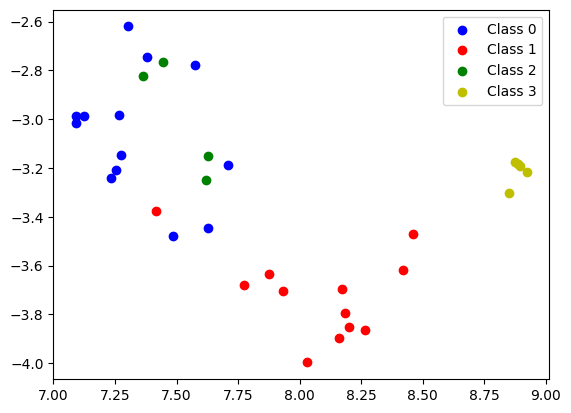

In [44]:
colors = ['b', 'r', 'g', 'y']

for label in range(4):
    class_indices = deepwalk_y == label
    
    class_data = tsne_deepwalk[class_indices]
    plt.scatter(class_data[:, 0], class_data[:, 1], c=colors[label], label=f"Class {label}")

plt.legend()
plt.show()